# Machine Learning
### Théorie de d ́ecision Bayesienne

Dans ce notebook, nous allons coder les différentes étapes pour utiliser les méthodes de Bayes.

En général, on commence par iférer les paramètres des lois normales des v.a. conditionnées par la classe. 
Ensuite, on utilise le classifieur de notre choix : ML ou MAP

#### Une seule caractériqtique (feature) :

##### Données :

In [39]:
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=100, n_features=1, n_informative=1, n_clusters_per_class=1,
                           n_redundant=0, n_classes=2, random_state=2)

In [40]:
# On estime les paramètres des lois normales (voir cours) et les probabilités apriori
import numpy as np

def estimer(X, y):
    X0 = X[y==0]
    X1 = X[y==1]
    mu0, sigma0 = np.mean(X0), np.std(X0)
    mu1, sigma1 = np.mean(X1), np.std(X1)
    p0, p1 = len(X0) / len(X), len(X1) / len(X)
    return (mu0, sigma0), (mu1, sigma1), p0, p1

In [41]:
# On essaye sur notre dataset :
(m0, s0), (m1, s1), _, _ = estimer(X, y)

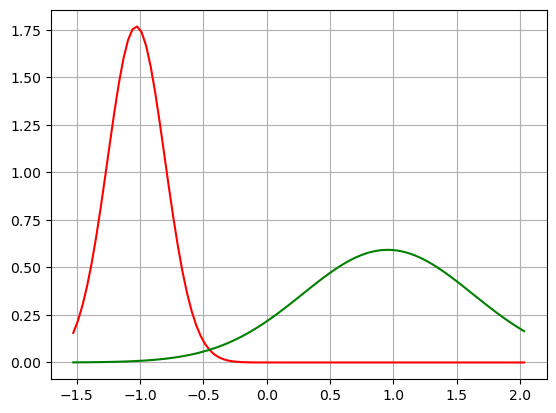

In [42]:
# On visualise les courbes :
from scipy import stats
import matplotlib.pyplot as plt
#print(min(X))
#print(max(X))
x0 = np.linspace(min(X), max(X), 100)
y0 = stats.norm.pdf(x0, m0, s0)

x1 = np.linspace(min(X), max(X), 100)
y1 = stats.norm.pdf(x1, m1, s1)

plt.grid()
plt.plot(x0, y0, c='r')
plt.plot(x1, y1, c='g')
plt.show()

In [29]:
# On définit les différents classifieurs :
def classify_ml(u, X, y):
    (m0, s0), (m1, s1), _, _ = estimer(X, y)
    f0 = stats.norm.pdf(u, m0, s0)
    f1 = stats.norm.pdf(u, m1, s1)
    return 0 if f0 > f1 else 1 

def classify_map(u, X, y):
    (m0, s0), (m1, s1), p0, p1 = estimer(X, y)
    f0 = stats.norm.pdf(u, m0, s0)
    f1 = stats.norm.pdf(u, m1, s1)
    return 0 if p0*f0 > p1*f1 else 1

In [43]:
# On teste nos classifieurs : 
u = 1.5
classify_ml(u, X, y)

1

#### Plusieurs features :

##### Données :

In [66]:
X, y = make_classification(n_samples=110, n_features=5, n_informative=3, n_clusters_per_class=2,
                           n_redundant=2, n_classes=2, random_state=2)

In [72]:
# La fonction retourne deux listes mus et sigmas et les deux estimateurs de probabilités

def estimer_plus(X, y):
    l = len(X[0])
    mus =  [(np.mean(X[:, d][y==0]), np.mean(X[:, d][y==1])) for d in range(l)]
    sigmas =  [(np.std(X[:, d][y==0]), np.std(X[:, d][y==1])) for d in range(l)]
    ps = (len(X[y==0])/len(X), len(X[y==1])/len(X))
    return mus, sigmas, ps
    

In [73]:
# On teste
estimer_plus(X, y)

([(-1.3717878141622188, 0.1069400223893394),
  (-0.6244667804604075, 0.28746280451996375),
  (0.19523242004030691, -0.007891997895086279),
  (-0.8953357260220356, 0.19696464694969182),
  (0.7168024478011736, -0.9857638470214101)],
 [(1.2175496318131052, 1.2515560524538887),
  (0.2791705053279843, 0.549799396106218),
  (1.1072506087740623, 0.9966719570554596),
  (1.0158125048569278, 0.5762538868281079),
  (1.1228162163894917, 1.0594352514494425)],
 (0.4909090909090909, 0.509090909090909))

In [74]:
# Classifieur MAP :
def classify(u, X, y):
    ms, ss, ps = estimer_plus(X, y)
    p0, p1 = ps[0], ps[1]
    p0 *= np.prod([stats.norm.pdf(u, ms[i][0], ss[i][0]) for i in range(len(ms))])
    p1 *= np.prod([stats.norm.pdf(u, ms[i][1], ss[i][1]) for i in range(len(ms))])
    return 0 if p0>p1 else 1
    

In [75]:
# On teste 
u = [1, 2, 3, 4, 5]
classify(u, X, y)

1

##### On teste sur un exemple un peu plus conséquent :

In [76]:
import pandas as pa
dic = {'S': [0, 0, 0, 0, 1, 1, 1, 1],
    # 'S': ['M', 'M', 'M', 'M', 'F', 'F', 'F', 'F'],
      'H': [1.82, 1.80, 1.70, 1.80, 1.52, 1.65, 1.68, 1.75],
      'W': [82, 86, 77, 75, 45, 68, 59, 68],
      'F': [30, 28, 30, 25, 15, 20, 18, 23]}

data = pa.DataFrame(data=dic)

In [77]:
X = np.array(data[['H', 'W', 'F']])
y = data['S']
u = [1.81, 59, 21]
'F' if classify(u, X, y) == 1 else 'M'

'F'

### En utilisant <code>sklearn</code>

In [78]:
dic = {'S': [0, 0, 0, 0, 1, 1, 1, 1],
    # 'S': ['M', 'M', 'M', 'M', 'F', 'F', 'F', 'F'],
      'H': [1.82, 1.80, 1.70, 1.80, 1.52, 1.65, 1.68, 1.75],
      'W': [82, 86, 77, 75, 45, 68, 59, 68],
      'F': [30, 28, 30, 25, 15, 20, 18, 23]}

data = pa.DataFrame(data=dic)
X = np.array(data[['H', 'W', 'F']])
y = data['S']
u = [1.81, 59, 21]

In [79]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X, y)

GaussianNB()

In [80]:
'F' if nb.predict([u]) == 1 else 'M'

'F'

### Naive Bayes avec un vrai dataset

In [87]:
# Data 
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
dataset = load_breast_cancer()
X = dataset.data
y = dataset.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

In [88]:
nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB()

In [90]:
from sklearn.metrics import confusion_matrix, classification_report
y_pred = nb.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
report = classification_report(y_test, y_pred)
print(report)

[[36  3]
 [ 2 73]]
              precision    recall  f1-score   support

           0       0.95      0.92      0.94        39
           1       0.96      0.97      0.97        75

    accuracy                           0.96       114
   macro avg       0.95      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114

